In [59]:
!pip install wordcloud

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

In [61]:
data = pd.read_csv("spam.csv", encoding='latin1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [62]:
print("Shape of the data :",data.shape)

Shape of the data : (5572, 5)


In [63]:
# we don't need last three columns 
data = pd.DataFrame({"text":data.iloc[:,1],"target":data.iloc[:,0]})
data.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [64]:
print(f"Total Null values :",data.isna().sum().sum())

Total Null values : 0


In [65]:
print(f"Total duplicate values :",data.duplicated().sum())

Total duplicate values : 403


In [66]:
data.drop_duplicates(inplace=True)
print(f"Total duplicate values :",data.duplicated().sum())
print("Shape of the data :",data.shape)

Total duplicate values : 0
Shape of the data : (5169, 2)


## EDA

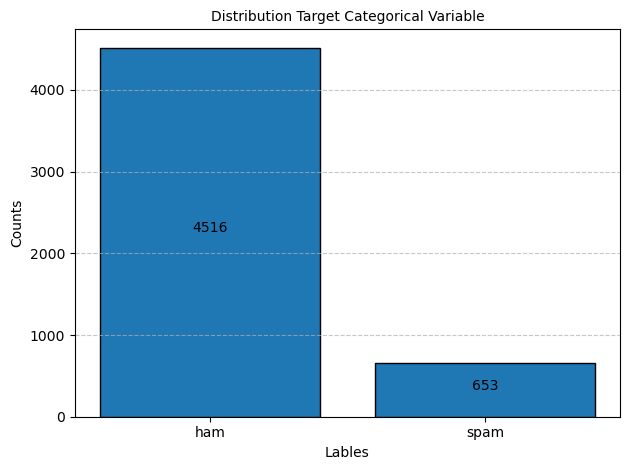

In [68]:
class_counts = data["target"].value_counts()
bar_plot = plt.bar(class_counts.index,class_counts.values,edgecolor='black')
plt.title('Distribution Target Categorical Variable', fontsize=10)
plt.xlabel('Lables', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bar_plot:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height()/2,
             str(bar.get_height()), ha='center', fontsize=10)
    
plt.tight_layout()
plt.show()

In [69]:
# we need more data for prediction 
def char_counter(sentence):
    return len(sentence)

def word_counter(sentence):
    return len(nltk.word_tokenize(sentence))

def sentence_counter(sentence):
    return len(nltk.sent_tokenize(sentence))

In [70]:
data["Num Chars"] = data["text"].apply(lambda x:char_counter(x))
data["Num Words"] = data["text"].apply(lambda x:word_counter(x))
data["Num Sentences"] = data["text"].apply(lambda x:sentence_counter(x))

In [71]:
data = data[["text","Num Chars","Num Words","Num Sentences","target"]]
data.head()

,text,Num Chars,Num Words,Num Sentences,target
0,"Go until jurong point, crazy.. Available only ...",111,24,2,ham
1,Ok lar... Joking wif u oni...,29,8,2,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,spam
3,U dun say so early hor... U c already then say...,49,13,1,ham
4,"Nah I don't think he goes to usf, he lives aro...",61,15,1,ham


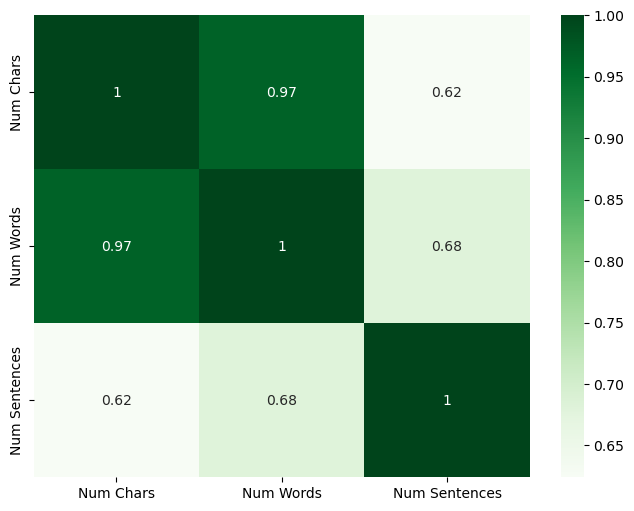

In [72]:
corr_matrix = data[["Num Chars","Num Words","Num Sentences"]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap="Greens")
plt.show()

In [73]:
ham_data = data[data["target"]=="ham"]
spam_data = data[data["target"]=="spam"]

In [74]:
ham_data.describe()

,Num Chars,Num Words,Num Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [75]:
spam_data.describe()

,Num Chars,Num Words,Num Sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


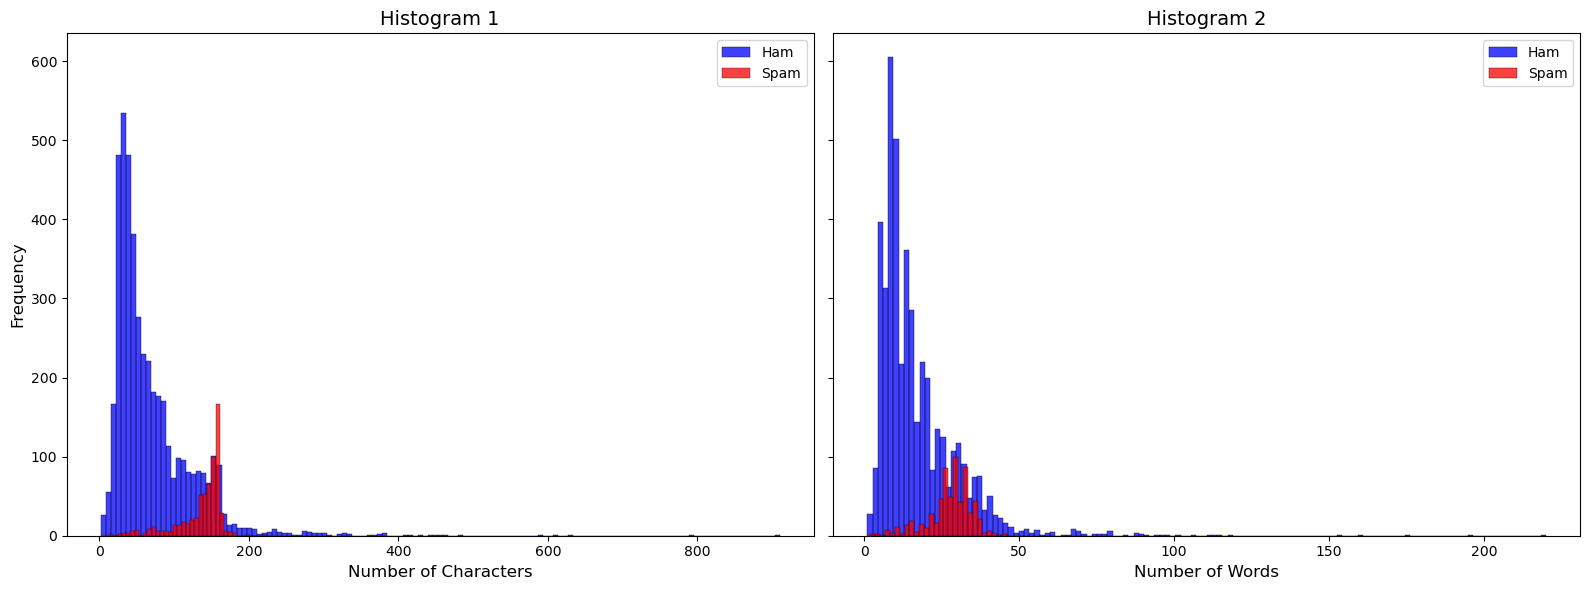

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Left plot
sns.histplot(ham_data["Num Chars"], color='blue', label="Ham", ax=axes[0])
sns.histplot(spam_data['Num Chars'], color='red', label="Spam", ax=axes[0])
axes[0].set_title("Histogram 1", fontsize=14)
axes[0].set_xlabel("Number of Characters", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].legend()

# Right plot
sns.histplot(ham_data["Num Words"], color='blue', label="Ham", ax=axes[1])
sns.histplot(spam_data['Num Words'], color='red', label="Spam", ax=axes[1])
axes[1].set_title("Histogram 2", fontsize=14)
axes[1].set_xlabel("Number of Words", fontsize=12)
axes[1].legend()

plt.tight_layout()
plt.show()


## Data Preprocessig
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [78]:
ps = PorterStemmer()

def transform_text(sentence):
    # Convert to lowercase
    sentence = sentence.lower()
    
    # Tokenization
    tokens = nltk.word_tokenize(sentence)
    
    # Keep only alphanumeric tokens
    internal_data = []
    for token in tokens:
        if token.isalnum():
            internal_data.append(token)
    
    # Copy cleaned tokens back to sentence
    sentence = internal_data[:]
    internal_data.clear()
    
    # Remove stopwords
    for token in sentence:
        if token not in stopwords.words('english'):
            internal_data.append(token)
    
    # Copy remaining tokens back to sentence
    sentence = internal_data[:]
    internal_data.clear()
    
    # Apply stemming
    for token in sentence:
        internal_data.append(ps.stem(token))
    
    # Join tokens into a single string
    transformed_sentence = " ".join(internal_data)
    
    return transformed_sentence

In [79]:
print("Data before processed :",data["text"][4])
print("Data after processed :",transform_text(data["text"][4]))

Data before processed : Nah I don't think he goes to usf, he lives around here though
Data after processed : nah think goe usf live around though


In [80]:
data["transformed_text"] = data["text"].apply(lambda x:transform_text(x))
data.head()

,text,Num Chars,Num Words,Num Sentences,target,transformed_text
0,"Go until jurong point, crazy.. Available only ...",111,24,2,ham,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,29,8,2,ham,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,spam,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,49,13,1,ham,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",61,15,1,ham,nah think goe usf live around though


In [81]:
ham_data = data[data["target"]=="ham"]
spam_data = data[data["target"]=="spam"]

In [82]:
wc = WordCloud(width=600,height=600,min_font_size=10,background_color="beige")

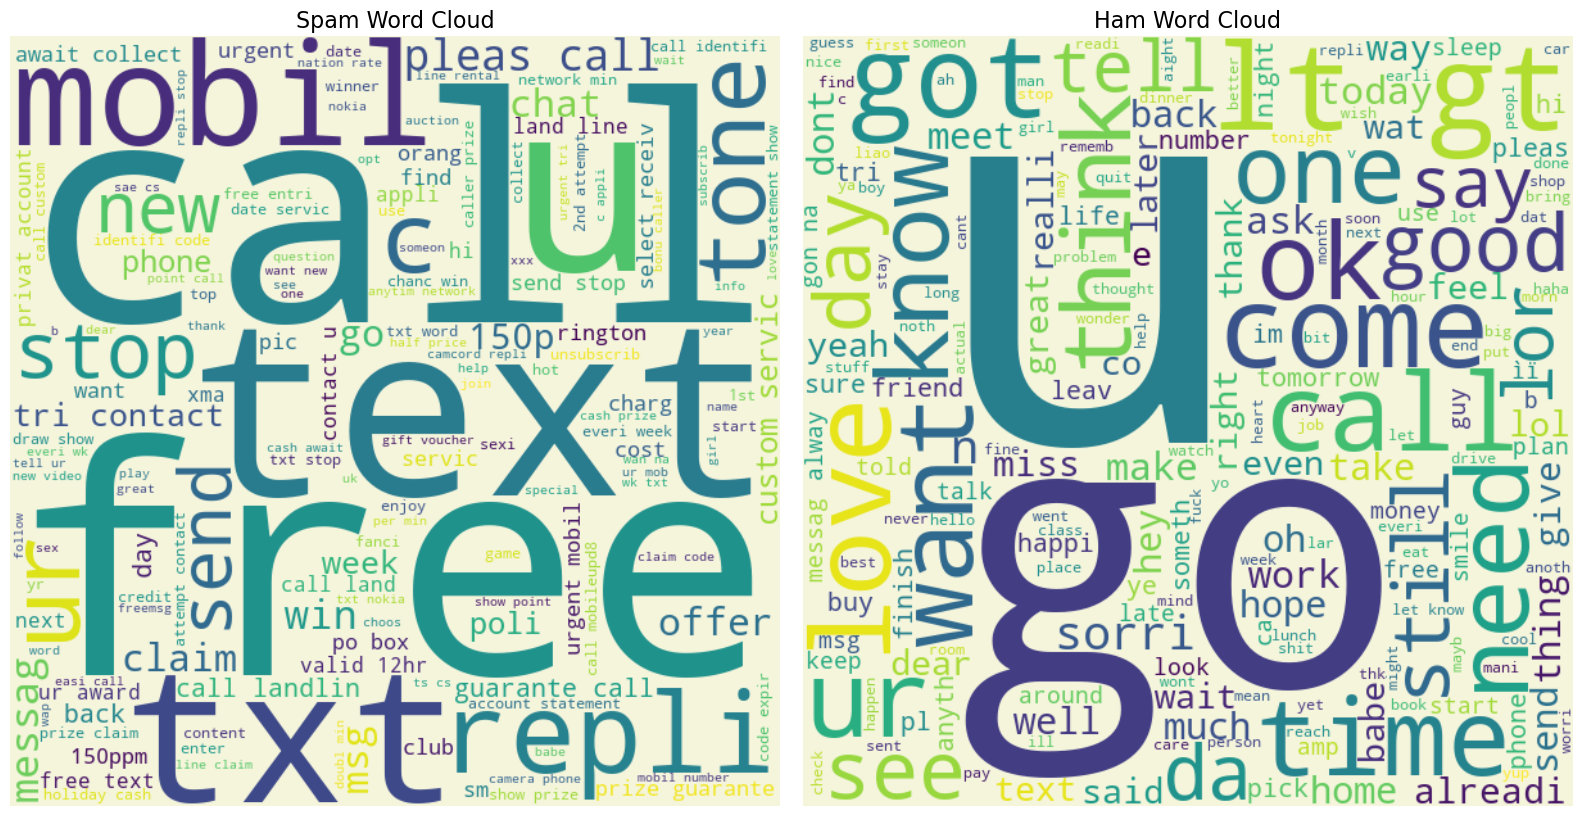

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Spam word cloud
spam_wc = wc.generate(spam_data["transformed_text"].str.cat(sep=" "))
axes[0].imshow(spam_wc, interpolation='bilinear')
axes[0].set_title("Spam Word Cloud", fontsize=16)
axes[0].axis('off')

# Ham word cloud
ham_wc = wc.generate(ham_data["transformed_text"].str.cat(sep=" "))
axes[1].imshow(ham_wc, interpolation='bilinear')
axes[1].set_title("Ham Word Cloud", fontsize=16)
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [84]:
def create_corpus(lst):
    corpus = []
    for msg in lst:
        for word in msg.split():
            corpus.append(word)
    return corpus

In [85]:
spam_corpus = create_corpus(spam_data["transformed_text"].tolist())
ham_corpus = create_corpus(ham_data["transformed_text"].tolist())

In [86]:
spam_most_occured =  pd.DataFrame(Counter(spam_corpus).most_common(30),columns=["Spam_Word","Spam_Word_Occurrance"])
ham_most_occured =  pd.DataFrame(Counter(ham_corpus).most_common(30),columns=["Ham_Word","Ham_Word_Occurrance"])

In [87]:
most_occured = pd.concat([spam_most_occured, ham_most_occured], axis=1)
most_occured.head(30)

,Spam_Word,Spam_Word_Occurrance,Ham_Word,Ham_Word_Occurrance
0,call,320,u,883
1,free,191,go,404
2,2,155,get,349
3,txt,141,gt,288
4,text,122,lt,287
5,u,119,2,284
6,ur,119,come,275
7,mobil,114,got,236
8,stop,104,know,236
9,repli,103,like,234


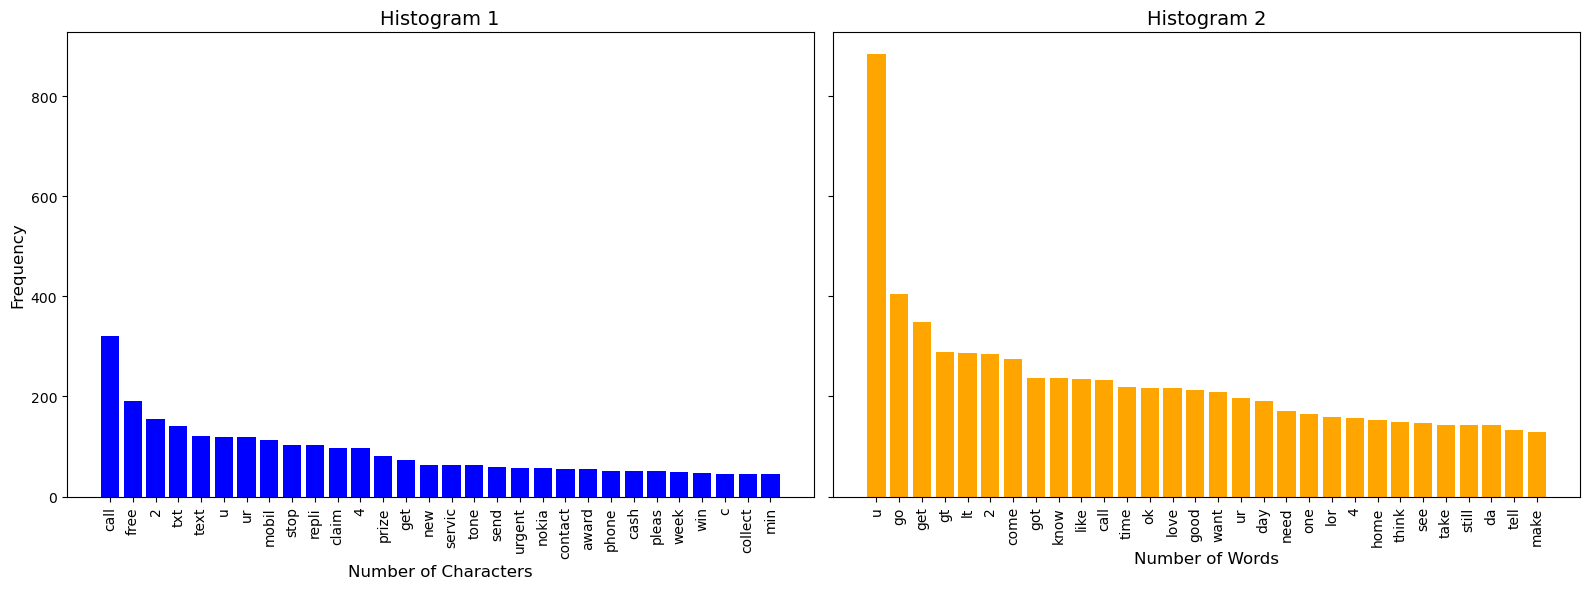

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Left plot: Plot for the first set of data
axes[0].bar(most_occured.iloc[:, 0], most_occured.iloc[:, 1], color='blue')
axes[0].set_title("Histogram 1", fontsize=14)
axes[0].set_xlabel("Number of Characters", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].set_xticks(range(len(most_occured.iloc[:, 0])))
axes[0].set_xticklabels(most_occured.iloc[:, 0], rotation=90)

# Right plot: Plot for the second set of data
axes[1].bar(most_occured.iloc[:, 2], most_occured.iloc[:, 3], color='orange')
axes[1].set_title("Histogram 2", fontsize=14)
axes[1].set_xlabel("Number of Words", fontsize=12)
axes[1].set_xticks(range(len(most_occured.iloc[:, 2])))
axes[1].set_xticklabels(most_occured.iloc[:, 2], rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()


In [89]:
LE = LabelEncoder()
data['target'] = LE.fit_transform(data['target'])

data = data[["text","transformed_text","Num Chars","Num Words","Num Sentences","target"]]
data.head()

,text,transformed_text,Num Chars,Num Words,Num Sentences,target
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,111,24,2,0
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni,29,8,2,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2,1
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,49,13,1,0
4,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,61,15,1,0


## Model Building

In [91]:
cv  = CountVectorizer()
tfidf = TfidfVectorizer()

In [92]:
X_CV = cv.fit_transform(data["transformed_text"]).toarray()
X_TFIDF = tfidf.fit_transform(data["transformed_text"]).toarray()
y = data["target"]

In [93]:
X_Train_CV, X_test_CV, y_train_CV, y_test_CV = train_test_split(X_CV,y,test_size=0.3,random_state=42)
X_Train_TFIDF, X_test_TFIDF, y_train_TFIDF, y_test_TFIDF = train_test_split(X_TFIDF,y,test_size=0.3,random_state=42)

In [94]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
lr = LogisticRegression()
svm = SVC(kernel='sigmoid',gamma=0.1)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier(n_estimators=50,random_state=42)

In [95]:
gnb.fit(X_Train_CV,y_train_CV)
mnb.fit(X_Train_CV,y_train_CV)
bnb.fit(X_Train_CV,y_train_CV)
lr.fit(X_Train_CV,y_train_CV)
svm.fit(X_Train_CV,y_train_CV)
knn.fit(X_Train_CV,y_train_CV)
dt.fit(X_Train_CV,y_train_CV)
rf.fit(X_Train_CV,y_train_CV)

y_pred_gnb_cv = gnb.predict(X_test_CV)
y_pred_mnb_cv = mnb.predict(X_test_CV)
y_pred_bnb_cv = bnb.predict(X_test_CV)
y_pred_lr_cv = lr.predict(X_test_CV)
y_pred_svm_cv = svm.predict(X_test_CV)
y_pred_knn_cv = knn.predict(X_test_CV)
y_pred_dt_cv = dt.predict(X_test_CV)
y_pred_rf_cv = rf.predict(X_test_CV)

In [96]:
# Assuming y_test_CV and predictions from all models for CV
models_pred_cv = {
    'GNB': y_pred_gnb_cv,
    'MNB': y_pred_mnb_cv,
    'BNB': y_pred_bnb_cv,
    'LR': y_pred_lr_cv,
    'SVM': y_pred_svm_cv, 
    'KNN': y_pred_knn_cv,
    'DT': y_pred_dt_cv,
    'RF': y_pred_rf_cv
}

# Calculate precision scores for all models
precisions_cv = {name: precision_score(y_test_CV, pred) for name, pred in models_pred_cv.items()}
accuracy_cv = {name: accuracy_score(y_test_CV, pred) for name, pred in models_pred_cv.items()}

In [97]:
precisions_cv

{'GNB': 0.5428571428571428,
 'MNB': 0.9066666666666666,
 'BNB': 0.9717514124293786,
 'LR': 0.9791666666666666,
 'SVM': 0.9738219895287958,
 'KNN': 1.0,
 'DT': 0.9411764705882353,
 'RF': 0.9938650306748467}

In [98]:
accuracy_cv

{'GNB': 0.877498388136686,
 'MNB': 0.9761444229529336,
 'BNB': 0.9658284977433914,
 'LR': 0.97678916827853,
 'SVM': 0.9748549323017408,
 'KNN': 0.8955512572533849,
 'DT': 0.9258542875564152,
 'RF': 0.961960025789813}

In [99]:
# Normalize precision scores to sum to 1 (weights)
total_precision_cv = sum(precisions_cv.values())
weights_cv = {name: score / total_precision_cv for name, score in precisions_cv.items()}
weights_cv

{'GNB': 0.07426932036335757,
 'MNB': 0.12404279471213406,
 'BNB': 0.13294716282706293,
 'LR': 0.13396165789224035,
 'SVM': 0.1332304424264144,
 'KNN': 0.1368119059325008,
 'DT': 0.12876414676000075,
 'RF': 0.13597256908628913}

In [100]:
unique_classes = np.unique(y_test_CV)  # Unique class labels
final_votes_cv = []

# Loop through each test sample
for i in range(len(y_test_CV)):
    weighted_vote = {cls: 0 for cls in unique_classes} 
    for name, pred in models_pred_cv.items():
        model_vote = pred[i]
        weighted_vote[model_vote] += weights_cv[name] 
    
    final_prediction = max(weighted_vote, key=weighted_vote.get)
    final_votes_cv.append(final_prediction)

In [101]:
precisions_cv["voter"] = precision_score(y_test_CV, final_votes_cv)
accuracy_cv["voter"] = accuracy_score(y_test_CV, final_votes_cv)

print("Voter Mechanism Accuracy:", accuracy_cv["voter"])
print("Voter Mechanism Precision:", precisions_cv["voter"])

Voter Mechanism Accuracy: 0.9748549323017408
Voter Mechanism Precision: 1.0


In [102]:
gnb.fit(X_Train_TFIDF,y_train_TFIDF)
mnb.fit(X_Train_TFIDF,y_train_TFIDF)
bnb.fit(X_Train_TFIDF,y_train_TFIDF)
lr.fit(X_Train_TFIDF,y_train_TFIDF)
svm.fit(X_Train_TFIDF,y_train_TFIDF)
knn.fit(X_Train_TFIDF,y_train_TFIDF)
dt.fit(X_Train_TFIDF,y_train_TFIDF)
rf.fit(X_Train_TFIDF,y_train_TFIDF)

y_pred_gnb_tfidf = gnb.predict(X_test_TFIDF)
y_pred_mnb_tfidf = mnb.predict(X_test_TFIDF)
y_pred_bnb_tfidf = bnb.predict(X_test_TFIDF)
y_pred_lr_tfidf = lr.predict(X_test_TFIDF)
y_pred_svm_tfidf = svm.predict(X_test_TFIDF)
y_pred_knn_tfidf = knn.predict(X_test_TFIDF)
y_pred_dt_tfidf = dt.predict(X_test_TFIDF)
y_pred_rf_tfidf = rf.predict(X_test_TFIDF)

In [103]:
# Assuming y_test_CV and predictions from all models for CV
models_pred_TFIDF = {
    'GNB': y_pred_gnb_tfidf,
    'MNB': y_pred_mnb_tfidf,
    'BNB': y_pred_bnb_tfidf,
    'LR': y_pred_lr_tfidf,
    'SVM': y_pred_svm_tfidf, 
    'KNN': y_pred_knn_tfidf,
    'DT': y_pred_dt_tfidf,
    'RF': y_pred_rf_tfidf
}

# Calculate precision scores for all models
precisions_tfidf = {name: precision_score(y_test_TFIDF, pred) for name, pred in models_pred_TFIDF.items()}
accuracy_tfidf = {name: accuracy_score(y_test_TFIDF, pred) for name, pred in models_pred_TFIDF.items()}

In [104]:
precisions_tfidf

{'GNB': 0.5375722543352601,
 'MNB': 1.0,
 'BNB': 0.9717514124293786,
 'LR': 0.9568345323741008,
 'SVM': 0.9818181818181818,
 'KNN': 1.0,
 'DT': 0.8333333333333334,
 'RF': 0.9940476190476191}

In [105]:
accuracy_tfidf

{'GNB': 0.8749194068343005,
 'MNB': 0.9542230818826564,
 'BNB': 0.9658284977433914,
 'LR': 0.9400386847195358,
 'SVM': 0.8923275306254029,
 'KNN': 0.8884590586718246,
 'DT': 0.9329464861379755,
 'RF': 0.965183752417795}

In [106]:
# Normalize precision scores to sum to 1 (weights)
total_precision_tfidf = sum(precisions_tfidf.values())
weights_tfidf = {name: score / total_precision_tfidf for name, score in precisions_tfidf.items()}
weights_tfidf

{'GNB': 0.07388946407785946,
 'MNB': 0.13745029339214718,
 'BNB': 0.1335675167426515,
 'LR': 0.1315171872025581,
 'SVM': 0.13495119714865358,
 'KNN': 0.13745029339214718,
 'DT': 0.11454191116012265,
 'RF': 0.13663213688386058}

In [107]:
final_votes_tfidf = []

# Loop through each test sample
for i in range(len(y_test_TFIDF)):
    weighted_vote = {cls: 0 for cls in unique_classes} 
    for name, pred in models_pred_TFIDF.items():
        model_vote = pred[i]
        weighted_vote[model_vote] += weights_tfidf[name] 
    
    final_prediction = max(weighted_vote, key=weighted_vote.get)
    final_votes_tfidf.append(final_prediction)

In [108]:
precisions_tfidf["voter"] = precision_score(y_test_TFIDF, final_votes_tfidf)
accuracy_tfidf["voter"] = accuracy_score(y_test_TFIDF, final_votes_tfidf)

print("Voter Mechanism Accuracy:", accuracy_tfidf["voter"])
print("Voter Mechanism Precision:", precisions_tfidf["voter"])

Voter Mechanism Accuracy: 0.9464861379754996
Voter Mechanism Precision: 1.0


In [109]:
algorithms = accuracy_cv.keys()

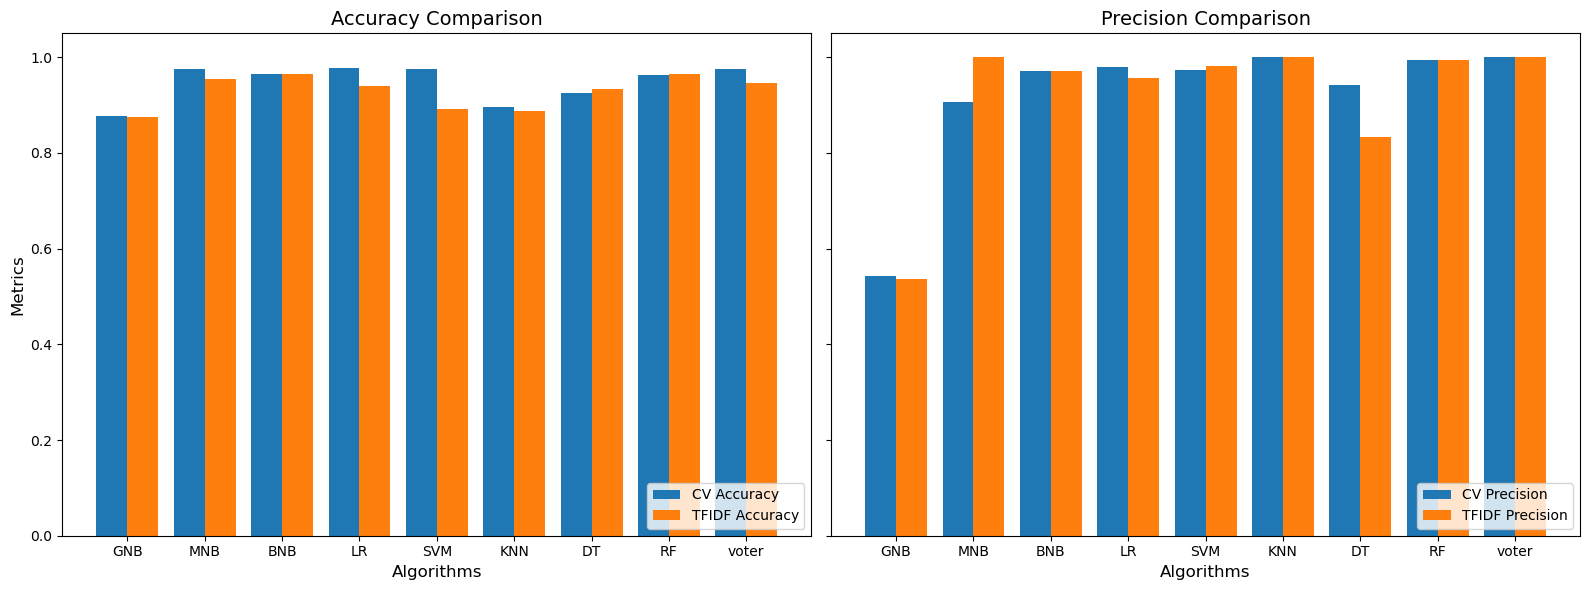

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Accuracy comparison
x = np.arange(len(algorithms))
axes[0].bar(x - 0.2, accuracy_cv.values(), width=0.4, label='CV Accuracy', align='center')
axes[0].bar(x + 0.2, accuracy_tfidf.values(), width=0.4, label='TFIDF Accuracy', align='center')
axes[0].set_xticks(x)
axes[0].set_xticklabels(algorithms)
axes[0].set_title('Accuracy Comparison', fontsize=14)
axes[0].set_xlabel('Algorithms', fontsize=12)
axes[0].set_ylabel('Metrics', fontsize=12)
axes[0].legend(loc='lower right')

# Precision comparison
axes[1].bar(x - 0.2, precisions_cv.values(), width=0.4, label='CV Precision', align='center')
axes[1].bar(x + 0.2, precisions_tfidf.values(), width=0.4, label='TFIDF Precision', align='center')
axes[1].set_xticks(x)
axes[1].set_xticklabels(algorithms)
axes[1].set_title('Precision Comparison', fontsize=14)
axes[1].set_xlabel('Algorithms', fontsize=12)
axes[1].legend(loc='lower right')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [111]:
results = pd.DataFrame({
    "accuracy_cv" : accuracy_cv,
    "accuracy_tfidf" : accuracy_tfidf,
    "precisions_cv" : precisions_cv,
    "precisions_tfidf" : precisions_tfidf
    })
results

,accuracy_cv,accuracy_tfidf,precisions_cv,precisions_tfidf
GNB,0.877498,0.874919,0.542857,0.537572
MNB,0.976144,0.954223,0.906667,1.000000
BNB,0.965828,0.965828,0.971751,0.971751
LR,0.976789,0.940039,0.979167,0.956835
SVM,0.974855,0.892328,0.973822,0.981818
KNN,0.895551,0.888459,1.000000,1.000000
DT,0.925854,0.932946,0.941176,0.833333
RF,0.961960,0.965184,0.993865,0.994048
voter,0.974855,0.946486,1.000000,1.000000
